In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


b. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
df = df.drop(columns = ["N", "address", "grades", "restaurant_id"])
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
#   secondo modo
df.filter(items = ["borough", "cuisine", "name"])

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


c. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
#   conta un valore specifico di una colonna
df[df["borough"] == "Missing"].count()

borough    51
cuisine    51
name       51
dtype: int64

d. Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
import numpy as np

In [ ]:
#   per sostituire un valore con null
df["borough"] = df["borough"].replace('Missing', np.nan)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
#   secondo modo
df["borough"].replace('Missing', np.nan, inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


e. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df.drop(df[df["borough"].isnull()].index, inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
#   secondo modo
#   .dropna()  ------>   elimina i valori di una colonna che hanno come valore null
#   
df.dropna(inplace = True)
df.count()

borough    25157
cuisine    25157
name       25157
dtype: int64

f. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina
che ha più ristoranti

In [ ]:
df.groupby("cuisine")["name"].count().sort_values(ascending = False)

cuisine
American           6173
Chinese            2412
Café/Coffee/Tea    1210
Pizza              1162
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

In [ ]:
#   modo piu semplice
df["cuisine"].value_counts()

American           6173
Chinese            2412
Café/Coffee/Tea    1210
Pizza              1162
Italian            1069
                   ... 
Iranian               2
Californian           1
Creole/Cajun          1
Chilean               1
Polynesian            1
Name: cuisine, Length: 85, dtype: int64

g. Visualizzi il tipo di cucina con più ristoranti

In [ ]:
df2 = df.groupby("cuisine")["name"].count()
df2[df2 == df2.max()]

cuisine
American    6173
Name: name, dtype: int64

In [ ]:
#  secondo modo usando .value_counts() 
df["cuisine"].value_counts().sort_values(ascending = False).index[0]

'American'

In [ ]:
#   di giurato
#   .reset_index()  ----->   diventa da indice a una colonna
df5 = df.groupby("cuisine").count().reset_index()
df5[df5["name"] == df5["name"].max()]["cuisine"]

2    American
Name: cuisine, dtype: object

h. Visualizzi un grafico a barre con i primi 10 tipi di cucina

In [ ]:
#   per fare una propria tabella con groupby
#   as_index = False  ---->   cosi non è piu un index ma una colonna
df3 = df.groupby("cuisine", as_index = False)["name"].count().sort_values("name", ascending = False)
df3

,cuisine,name
2,American,6173
19,Chinese,2412
13,Café/Coffee/Tea,1210
62,Pizza,1162
46,Italian,1069
...,...,...
44,Iranian,2
65,Polynesian,1
15,Californian,1
18,Chilean,1


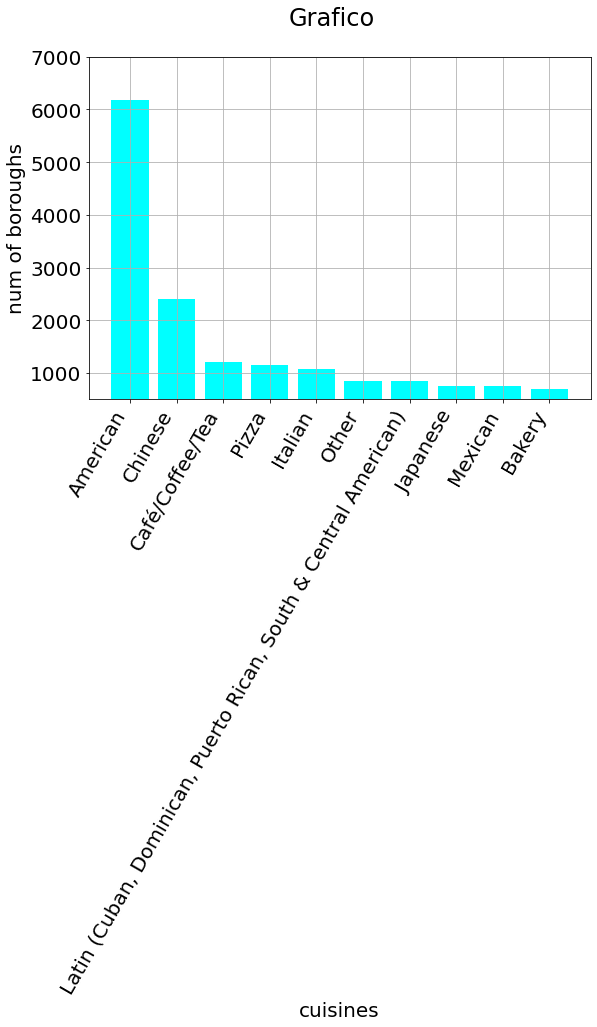

In [ ]:
df3 = df.groupby("cuisine", as_index = False)["name"].count().sort_values("name", ascending = False).head(10)
df3


#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 20})

#  crea la figura
fig = plt.figure(figsize=(9,7))

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(df3["cuisine"], df3["name"], color="cyan")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=60) 

#  crea un titolo nell'asse x
ax.set_xlabel("cuisines")

#  crea un titolo nell'asse y
ax.set_ylabel("num of boroughs")

#  crea una griglia
ax.grid()

#  crea un titolo
fig.suptitle("Grafico")

#per mettere che y inizia da 500
ax.set_ylim([500, 7000])

plt.show()

i. Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
df.groupby("borough", as_index = False)["name"].count()

,borough,name
0,Bronx,2322
1,Brooklyn,6046
2,Manhattan,10211
3,Queens,5615
4,Staten Island,963


j. Visualizzi i dati precedenti in un grafico a torta

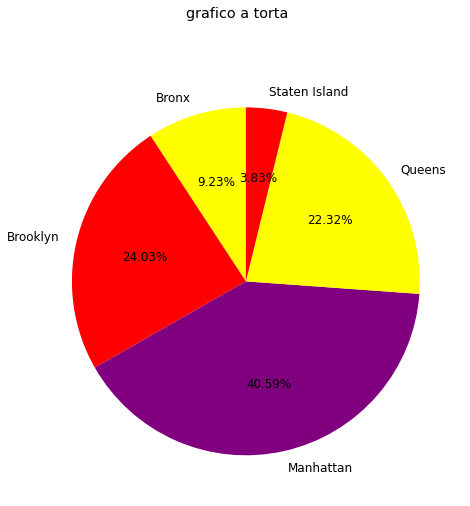

In [ ]:
plt.rcParams.update({"font.size" : 12})

data = df.groupby("borough", as_index = False)["name"].count()

fig = plt.figure(figsize = (10,8))
ax = plt.axes()

#  autopct = "%1.1f%%"  ----->    nelle virgolette il primo 1 è la lontananza dei percentuali
#  startangle = 90   ------>    per ruotare il grafico
#  colors = ["yellow", "red","purple"]    ------->   per colorare il grafico e si alternano
#  si scrive con l'= perche possiamo scrivere le funzioni senza ordine
ax.pie(data["name"],labels = data["borough"], autopct = "%1.2f%%",startangle = 90, colors = ["yellow", "red","purple"])

fig.suptitle("grafico a torta")

plt.show()

In [ ]:
###    se ti esce cosi i numeri sono chiamati: .values  ---->   df22.values
df22 = df.groupby("borough")["name"].count()
df22

borough
Bronx             2322
Brooklyn          6046
Manhattan        10211
Queens            5615
Staten Island      963
Name: name, dtype: int64

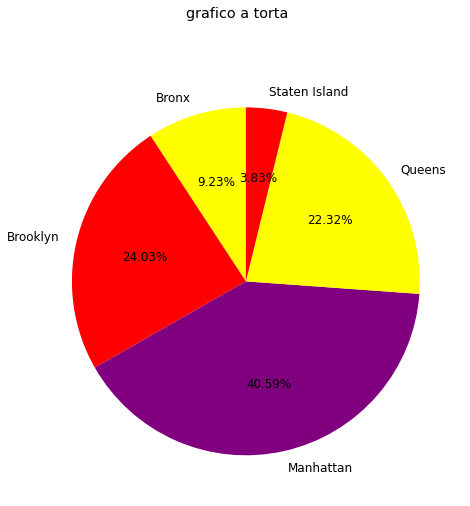

In [ ]:
plt.rcParams.update({"font.size" : 12})

fig = plt.figure(figsize = (10,8))
ax = plt.axes()

#  autopct = "%1.1f%%"  ----->    nelle virgolette il primo 1 è la lontananza dei percentuali
#  startangle = 90   ------>    per ruotare il grafico
#  colors = ["yellow", "red","purple"]    ------->   per colorare il grafico e si alternano
#  si scrive con l'= perche possiamo scrivere le funzioni senza ordine
ax.pie(df22.values,labels = df22.index, autopct = "%1.2f%%",startangle = 90, colors = ["yellow", "red","purple"])

fig.suptitle("grafico a torta")

plt.show()

k. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

<function matplotlib.pyplot.show>

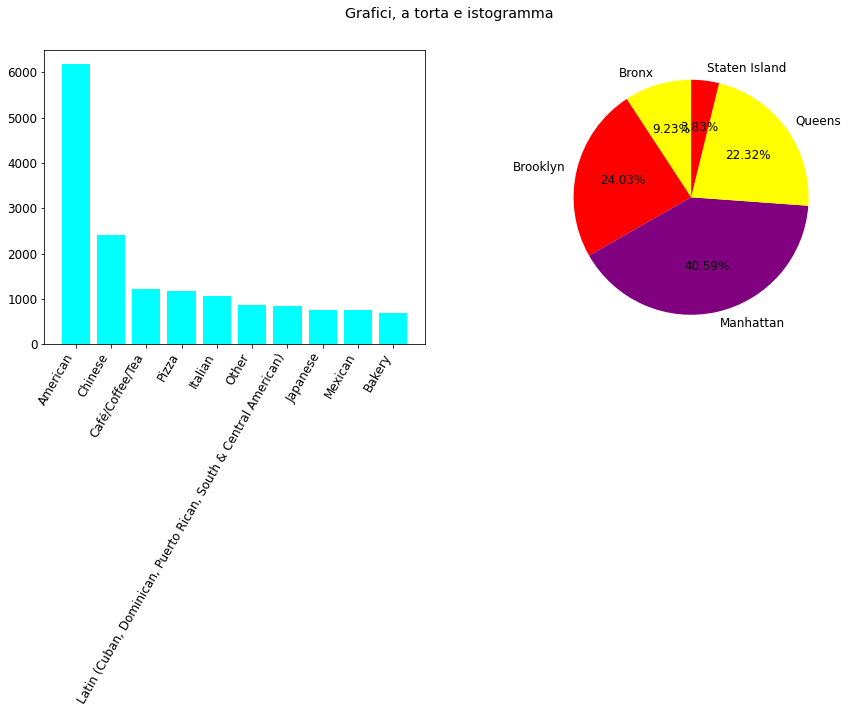

In [ ]:
#   modo per mettere 2 grafici affiancati
fig, (ax,ax2) = plt.subplots(1,2)


fig.set_size_inches(15,6)

ax.bar(df3["cuisine"], df3["name"], color="cyan")
fig.autofmt_xdate(rotation=60) 
ax2.pie(data["name"],labels = data["borough"], autopct = "%1.2f%%",startangle = 90, colors = ["yellow", "red","purple"])

fig.suptitle("Grafici, a torta e istogramma")

plt.show

l. Crei un nuovo dataframe sostituendo la parola &#39;non American&#39; a tutti i tipi di cucina che non sono
americani

In [ ]:
#   .tolist()  ----->    
nuovodf = df.replace(df[df["cuisine"] != "American"]["cuisine"].tolist(), "non American")
nuovodf

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25353,Manhattan,non American,Maid Cafe
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786


In [ ]:
#   modo piu semplice
portadf = df
portadf.loc[portadf["cuisine"] != "American", "cuisine"]= "Non American"
portadf

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25353,Manhattan,Non American,Maid Cafe
25354,Queens,Non American,Camden Food Express
25355,Manhattan,Non American,Wooly'S Nyc
25356,Manhattan,Non American,Rafi 786


m. Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana.

In [ ]:
#   per fare groupby con piu elementi, per farlo si usa una lista
df35 = portadf.groupby(["borough", "cuisine"]).count()
df35

name
borough       cuisine           
Bronx         American       411
              Non American  1911
Brooklyn      American      1273
              Non American  4773
Manhattan     American      3205
              Non American  7006
Queens        American      1040
              Non American  4575
Staten Island American       244
              Non American   719

n. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una
colonna che contiene il numero di ristoranti che propongono cucine non americane.

In [ ]:
#   .unstack()  ----->    it makes columns from the values of an existing column with its corresponding value
Ndf = df35.unstack(level =-1)
Ndf

name             
cuisine       American Non American
borough                            
Bronx              411         1911
Brooklyn          1273         4773
Manhattan         3205         7006
Queens            1040         4575
Staten Island      244          719

o. resetti l&#39;indice in modo da avere le tre colonne necessarie per costruire un grafico a barre:

In [ ]:
Ndf2 = Ndf["name"].reset_index()
Ndf2 

cuisine,borough,American,Non American
0,Bronx,411,1911
1,Brooklyn,1273,4773
2,Manhattan,3205,7006
3,Queens,1040,4575
4,Staten Island,244,719


p. Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti
americani ed una per quelli non americani.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


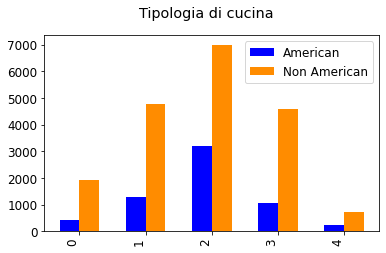

In [ ]:
fig = plt.figure(figsize=(6,4)) 
ax = plt.axes()

#   -0.15  ----->   perche la grandezza delle colonne è 0.3 e la meta è 0.15
#   +0.15  ----->   perche la grandezza delle colonne è 0.3 e la meta è 0.15
ax.bar(Ndf2.index - 0.15,Ndf2["American"],label="American",width=0.3,color="blue")
ax.bar(Ndf2.index + 0.15,Ndf2["Non American"],label="Non American",width=0.3,color="#ff8c00")
fig.autofmt_xdate(rotation=90)
fig.suptitle("Tipologia di cucina")

labels = list(Ndf2["borough"])
x = np.arange(len(labels))  # the label locations
ax.set_xticks(x, labels)

#   per mettere la legenda delle colonne o barre
ax.legend(loc=0)